# Using HII region catalog data

## Import some packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

## Some useful functions

In [3]:
def read_csv(file_path):
    if not os.path.isfile(file_path):
        print("File csv does not exists: {}".format(file_path))
        return None
    try:
        with open(file_path, "r") as file_input:
            lines = []
            for line in file_input:
                if line.startswith("#  COLUMN"):
                    lines.append(line.split()[2])
        table_df = pd.read_csv(file_path, comment='#', header=None)
        table_df.columns = lines
        table_df.set_index(lines[0], inplace=True)
    except:
        print('somethings wrong with csv file: {}'.format(file_path))
        return None
    return table_df

In [4]:
def kauffmann(log_NIIHa):
    val = 0.61 / (log_NIIHa - 0.05) + 1.3
    return val


def kewley(log_NIIHa):
    val = 0.61 / (log_NIIHa - 0.47) + 1.19
    return val

## Using CSV files

### Reading data

In [5]:
data = read_csv('/home/espinosa/data/CALIFA_DATA/main_table.csv')

## Using FITS files

### Reading data

Reading physical properties file

In [6]:
data_fits = fits.open('/home/espinosa/data/CALIFA_DATA/main_table.fits')[1].data

### Data structure

In [7]:
data

,f_y,dist,Av,OII3727_cor,H123750_cor,H113771_cor,H103798_cor,HeI3819_cor,H93835_cor,NeIII3869_cor,...,edq_IZI_J_byler_CSFR,euq_IZI_J_byler_CSFR,edq_IZI_mean_byler_CSFR,euq_IZI_mean_byler_CSFR,edq_IZI_max_byler_CSFR,euq_IZI_max_byler_CSFR,eNH_Pil16_R,eNO_HCm_no_interp,eNO_HCm_interp,eNe_Oster_S
HIIREGID,,,,,,,,,,,,,,,,,,,,,
2MASSXJ22532475-1,0.137743,0.142824,0.776740,94.304764,2.991211,-6.538717,-0.461934,3.377775,-5.125580,11.438453,...,0.454545,0.181818,0.139322,0.224314,0.121212,0.242424,0.014428,0.36,0.36,0.055842
2MASSXJ22532475-2,0.109211,0.083157,1.263837,210.043841,-6.493260,-8.249700,-3.191733,-7.220607,-1.318009,27.428863,...,0.363636,0.242424,0.147770,0.185564,0.181818,0.151515,0.022219,0.37,0.37,0.201480
2MASSXJ22532475-3,0.233925,0.265309,0.754034,77.383049,-2.211062,-4.216946,-4.091756,7.959131,1.888979,-0.882517,...,0.454545,0.151515,0.129884,0.233752,0.121212,0.242424,0.018023,0.37,0.37,0.507840
2MASSXJ22532475-4,0.211827,0.280490,0.637651,41.574411,-6.572414,-2.802544,4.466805,-0.774214,-3.215268,3.684810,...,0.333333,0.272727,0.145675,0.217962,0.151515,0.212121,0.023110,0.37,0.37,0.393606
2MASSXJ22532475-5,0.261642,0.281465,0.655894,22.225174,-0.144241,0.700954,3.836635,-3.778939,-3.471482,2.664433,...,0.303030,0.272727,0.148088,0.185245,0.181818,0.151515,0.046531,0.31,0.31,0.122235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UGC07993-14,0.156814,NaN,3.036369,985.807905,50.719027,-136.286857,78.783194,19.980578,-19.134435,106.339900,...,0.333333,0.242424,0.129861,0.203472,0.151515,0.181818,0.035753,0.07,0.06,0.081337
UGC07993-17,0.435114,NaN,1.129314,95.768835,11.435800,0.290751,0.222148,-5.140972,-5.437169,2.141877,...,0.333333,0.212121,0.120826,0.212508,0.181818,0.151515,0.026827,0.04,0.05,0.046182
UGC07993-22,0.221005,NaN,3.073277,853.560368,101.846781,-159.583315,37.997989,0.990057,-49.149452,132.590048,...,0.333333,0.212121,0.125620,0.207713,0.181818,0.151515,0.059362,0.05,0.03,0.067043


Fits File (Very long output)

In [ ]:
data_fits

### Plots

Using the data without any filter

In [8]:
NIIHa = np.log10(data.loc[:, 'NII6583_cor'] / data.loc[:, 'Ha6562_cor'])
OIIIHb = np.log10(data.loc[:, 'OIII5006_cor']/data.loc[:, 'Hb4861_cor'])
OH = data.loc[:, 'OH_Ho']
U = data.loc[:, 'U_Dors_O32']
Av = data.loc[:, 'Av']
NIIHa_fits = np.log10(data_fits['NII6583_cor'] / data_fits['Ha6562_cor'])
OIIIHb_fits = np.log10(data_fits['OIII5006_cor']/data_fits['Hb4861_cor'])
OH_fits = data_fits['OH_Ho']
U_fits = data_fits['U_Dors_O32']
Av_fits = data_fits['Av']

/home/espinosa/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_27542/897908226.py:6: RuntimeWarning: invalid value encountered in log10
  NIIHa_fits = np.log10(data_fits['NII6583_cor'] / data_fits['Ha6562_cor'])
/tmp/ipykernel_27542/897908226.py:7: RuntimeWarning: invalid value encountered in log10
  OIIIHb_fits = np.log10(data_fits['OIII5006_cor']/data_fits['Hb4861_cor'])


(-1.5, 1.0)

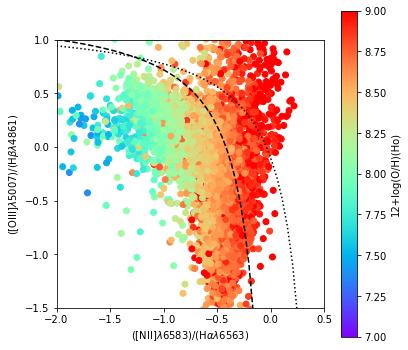

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=OH, cmap='rainbow', vmin=7, vmax=9)
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

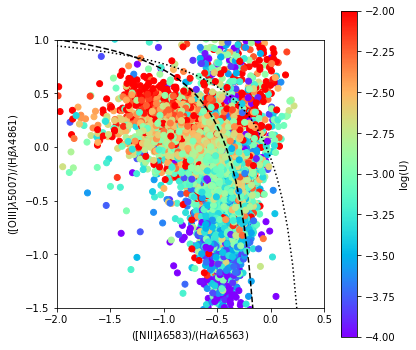

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=U, cmap='rainbow', vmin=-4, vmax=-2)
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('log(U)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

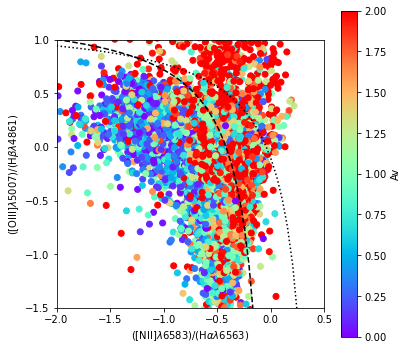

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=Av, cmap='rainbow', vmin=0, vmax=2)
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('Av')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

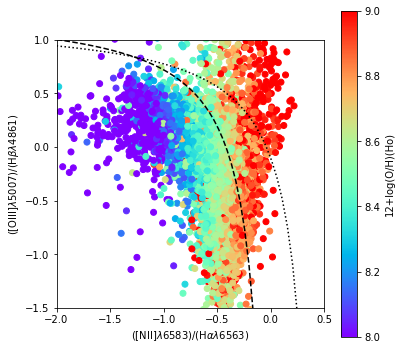

In [12]:
OH_Mar = data.loc[:, 'OH_M13_O3N2']
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=OH, cmap='rainbow', vmin=8, vmax=9)
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

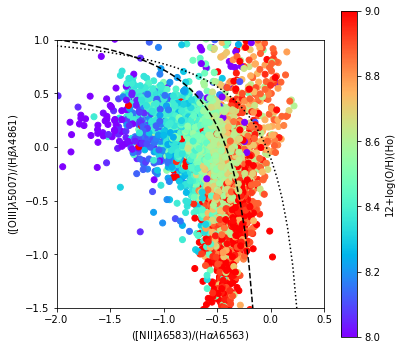

In [13]:
OH_NB = data.loc[:, 'OH_NB']
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=OH_NB, cmap='rainbow', vmin=8, vmax=9)
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

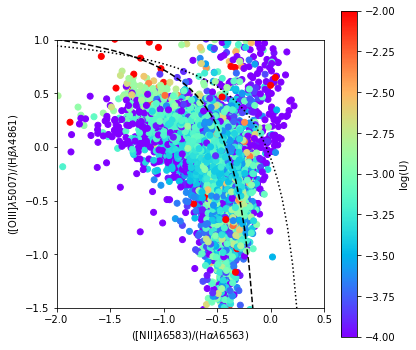

In [14]:
U_NB = data.loc[:, 'U_NB']
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=U_NB, cmap='rainbow', vmin=-4, vmax=-2)
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('log(U)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

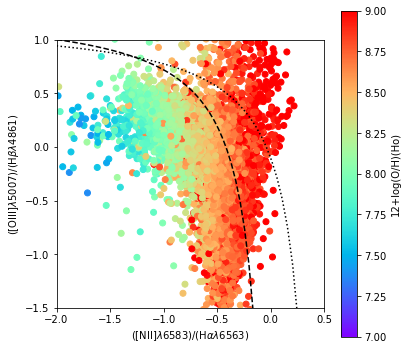

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa_fits, OIIIHb_fits, c=OH_fits, cmap='rainbow', vmin=7, vmax=9)
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

## Only one galaxy

CSV data

In [20]:
galname = 'NGC5947'
mask_gal = data.index.str.startswith(galname)
data_gal = data[mask_gal]

In [21]:
NIIHa_gal = np.log10(data_gal.loc[:, 'NII6583_cor'] / data_gal.loc[:, 'Ha6562_cor'])
OIIIHb_gal = np.log10(data_gal.loc[:, 'OIII5006_cor']/data_gal.loc[:, 'Hb4861_cor'])
OH_gal = data_gal.loc[:, 'OH_Ho']
U_gal = data_gal.loc[:, 'U_Dors_O32']
Av_gal = data_gal.loc[:, 'Av']


(-1.5, 1.0)

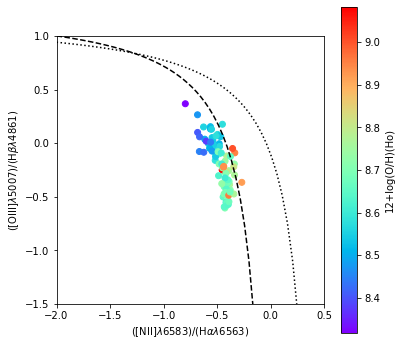

In [23]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa_gal, OIIIHb_gal, c=OH_gal, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

In [28]:
galname = 'NGC5947'
mask_fits_gal = data_fits['hiiregid'].startswith(galname)
data_fits_gal = data_fits[mask_gal]

In [31]:
NIIHa_fits_gal = np.log10(data_fits_gal['NII6583_cor'] / data_fits_gal['Ha6562_cor'])
OIIIHb_fits_gal = np.log10(data_fits_gal['OIII5006_cor']/data_fits_gal['Hb4861_cor'])
OH_fits_gal = data_fits_gal['OH_Ho']
U_fits_gal = data_fits_gal['U_Dors_O32']
Av_fits_gal = data_fits_gal['Av']

(-1.5, 1.0)

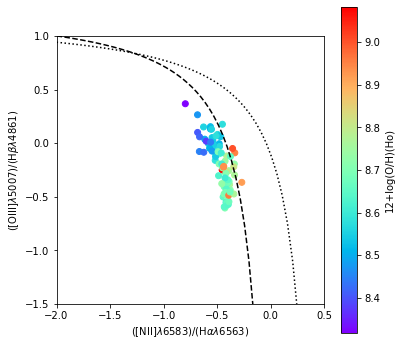

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa_fits_gal, OIIIHb_fits_gal, c=OH_fits_gal, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)